# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

Data set: https://github.com/DiploDatos/IntroduccionAprendizajeAutomatico/blob/master/data/loan_data.csv

https://www.kaggle.com/ajay1735/hmeq-data


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
url="https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv"
df = pd.read_csv(url,comment="#")

In [ ]:
# División entre instancias y etiquetas
X, y = df.iloc[:, 1:], df.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:



In [ ]:
df.head()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106


### 1. ¿De qué se trata el conjunto de datos?



El data set contiene información bancaria de personas, con el objetivo de automatizar la toma de decisiones para la aprobación de líneas de crédito con garantías hipotecarias.
Específicamente son datos recopilados de solicitantes de crédito a través de un proceso de suscripción de préstamos. 

### 2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene? 





El objetivo de este trabajo es determinar si las personas son aptas o no para acceder a un crédito hipotecario. Por este motivo la variable objetivo a predecir es Target. Se trata de variable binaria que indica si el solicitante del préstamo cumplió o incumplió con el pago.

### 3. ¿Qué información (atributos) hay disponible para hacer la predicción?



El conjunto de datos tiene los siguientes atributos:

TARGET: Etiqueta: 1 = cliente incumplió el préstamo. 0 = préstamo reembolsado.

LOAN : Importe de la solicitud de préstamo.

MORTDUE: Monto adeudado sobre la hipoteca existente.

VALUE: Valor actual de la propiedad.

YOJ: Años en el trabajo actual.

DEROG: Número de informes despectivos importantes.

DELINQ: Número de líneas de crédito morosas.

CLAGE: Antigüedad de la línea comercial más antigua en meses.

NINQ: Número de líneas de crédito recientes.

CLNO: Número de líneas de crédito.

DEBTINC: Relación deuda-ingresos.



### 4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

Algunas de las variables que creemos que pueden ser más relevantes para realizar las redicciones son:

- DEROG: Número de informes despectivos importantes.
- DELINQ: Número de líneas de crédito morosas.
- NINQ: Número de líneas de crédito recientes.
- DEBTINC: Relación deuda-ingresos.

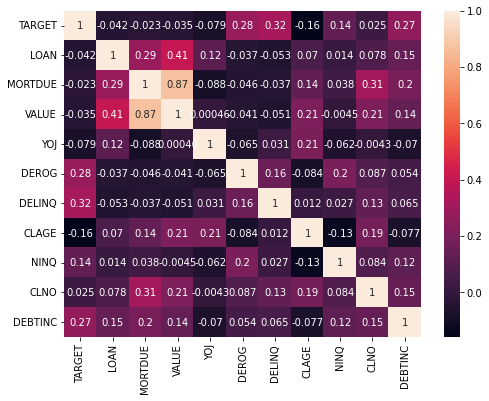

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,annot=True)
plt.show()

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


Entrenamiento:

In [ ]:
modelo = SGDClassifier(random_state=10)
modelo.fit(X_train, y_train)

SGDClassifier(random_state=10)

In [ ]:
modelo=Pipeline([('standardscaler', StandardScaler()), ('model',SGDClassifier(random_state=10))])

modelo.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('model', SGDClassifier(random_state=10))])

Predicción entrenamiento


In [ ]:
ypredict = modelo.predict(X_train)

In [ ]:
# import Performance measure
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
Accuracy=accuracy_score(y_train,ypredict) 
print("accuracy: ",Accuracy)
Recall=recall_score(y_train,ypredict, average=None) 
print("Recall: ",Recall)
Precision=precision_score(y_train,ypredict, average=None)
print("Precision : ",Precision)
f1 = f1_score(y_train, ypredict, average=None)
print("f1: ",f1)


accuracy:  0.8523263654753878
Recall:  [0.99431818 0.15537849]
Precision :  [0.85247042 0.84782609]
f1:  [0.9179468  0.26262626]


Matriz confusión

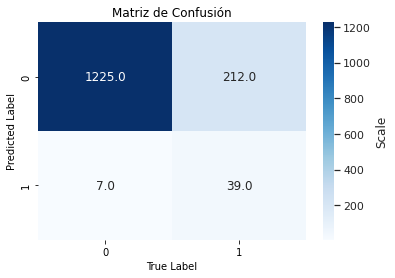

In [ ]:
confusionmatrix = confusion_matrix(y_train, ypredict)


plt.title("Matriz de Confusión" )

labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(confusionmatrix.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Predicted Label", xlabel="True Label")

plt.show()

Evaluación


In [ ]:
ypredice = modelo.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
Accuracy=accuracy_score(y_test,ypredice) 
print("accuracy: ",Accuracy)
Recall=recall_score(y_test,ypredice, average=None) 
print("Recall: ",Recall)
Precision=precision_score(y_test,ypredice, average=None)
print("Precision : ",Precision)
f1 = f1_score(y_test, ypredice, average=None)
print("f1: ",f1)

accuracy:  0.862533692722372
Recall:  [0.99361022 0.15517241]
Precision :  [0.86388889 0.81818182]
f1:  [0.92421991 0.26086957]


Matriz confusión

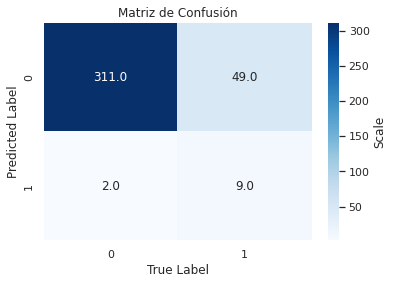

In [ ]:
confusionmatrix = confusion_matrix(y_test, ypredice)


plt.title("Matriz de Confusión" )

labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(confusionmatrix.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Predicted Label", xlabel="True Label")

plt.show()

### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto/ Diego

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

### Ejercicio 2.2: Ajuste de Hiperparámetros-

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.model_selection import GridSearchCV

modelo = SGDClassifier(random_state=10)

In [ ]:
modelo.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from scipy import stats
param_grid = {
    'model__loss': ['hinge', 'log', 'squared_error', 'squared_hinge'],
    'model__learning_rate':['constant', 'optimal','adaptive'],
    'model__alpha': [0.0, 0.001, 0.0001, 0.00001, 1.0, 10.0],
     }

Buscamos combinaciones

In [ ]:
modelo = Pipeline([('standardscaler', StandardScaler()), ('model',SGDClassifier(random_state=10, eta0=0.1))])

cv = GridSearchCV(modelo, param_grid, scoring ='accuracy', refit=True, cv=5)
cv.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 892, in fit
    sample_weight=sample_weight,
  File "/usr/local/lib/pyt

In [ ]:
results = cv.cv_results_

data_sdg_classifier=pd.DataFrame(results)
data_sdg_classifier.sort_values('rank_test_score')[:6]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__learning_rate,param_model__loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
33,0.024242,0.001014,0.003909,0.000071,0.0001,adaptive,log,"{'model__alpha': 0.0001, 'model__learning_rate...",0.868687,0.868687,0.868687,0.891892,0.858108,0.871212,0.011122,1
45,0.016265,0.000650,0.002308,0.000031,0.00001,adaptive,log,"{'model__alpha': 1e-05, 'model__learning_rate'...",0.865320,0.868687,0.868687,0.891892,0.858108,0.870539,0.011354,2
9,0.024704,0.001105,0.003979,0.000390,0.0,adaptive,log,"{'model__alpha': 0.0, 'model__learning_rate': ...",0.865320,0.868687,0.868687,0.891892,0.858108,0.870539,0.011354,2
20,0.015586,0.000626,0.004039,0.000244,0.001,adaptive,hinge,"{'model__alpha': 0.001, 'model__learning_rate'...",0.878788,0.861953,0.868687,0.881757,0.861486,0.870534,0.008402,4
16,0.012343,0.000619,0.003767,0.000240,0.001,optimal,hinge,"{'model__alpha': 0.001, 'model__learning_rate'...",0.861953,0.865320,0.868687,0.895270,0.858108,0.869868,0.013178,5
21,0.024240,0.000871,0.003981,0.000121,0.001,adaptive,log,"{'model__alpha': 0.001, 'model__learning_rate'...",0.868687,0.868687,0.861953,0.891892,0.858108,0.869865,0.011737,6


In [ ]:
data_sdg_classifier[['param_model__learning_rate','param_model__loss','param_model__alpha','mean_test_score','std_test_score','rank_test_score']]

,param_model__learning_rate,param_model__loss,param_model__alpha,mean_test_score,std_test_score,rank_test_score
0,constant,hinge,0.0,0.824654,0.038613,51
1,constant,log,0.0,0.844890,0.036519,26
2,constant,squared_error,0.0,0.426340,0.116656,65
3,constant,squared_hinge,0.0,0.769417,0.036179,60
4,optimal,hinge,0.0,NaN,NaN,72
...,...,...,...,...,...,...
67,optimal,squared_hinge,10.0,0.834127,0.004700,36
68,adaptive,hinge,10.0,0.830749,0.001259,38
69,adaptive,log,10.0,0.830749,0.001259,38
70,adaptive,squared_error,10.0,0.830749,0.001259,38


Selección de modelo

In [ ]:
best = cv.best_estimator_
best

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('model',
                 SGDClassifier(eta0=0.1, learning_rate='adaptive', loss='log',
                               random_state=10))])

In [ ]:
best.classes_

array([0, 1])

In [ ]:
best.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cv.best_params_

{'model__alpha': 0.0001,
 'model__learning_rate': 'adaptive',
 'model__loss': 'log'}

Entrenamiento mejor modelo

In [ ]:
BM = Pipeline([('standardscaler', StandardScaler()), ('model',SGDClassifier(alpha=0.0001, loss='log', max_iter=3000, random_state=10, eta0=0.1, learning_rate='adaptive', penalty='l2'))])
BM.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('model',
                 SGDClassifier(eta0=0.1, learning_rate='adaptive', loss='log',
                               max_iter=3000, random_state=10))])

In [ ]:
ypredtrain = BM.predict(X_train)

predicción y evaluación conjunto entrenamiento mejor modelo

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
accuracy=accuracy_score(y_train,ypredtrain) 
print("accuracy : ",accuracy)
recall=recall_score(y_train,ypredtrain, average= None) 
print("recall : ",recall)
precision=precision_score(y_train,ypredtrain, average= None)
print("precision : ",precision)
f1 = f1_score(y_train, ypredtrain, average= None)
print("f1 : ",f1)


accuracy :  0.8739042481456507
recall :  [0.98376623 0.33466135]
precision :  [0.87889775 0.80769231]
f1 :  [0.92837993 0.47323944]


Matriz de Confusión para el conjunto de Entrenamiento

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, ypredtrain)
print(cm.T)

[[1212  167]
 [  20   84]]


[Text(30.5, 0.5, 'Predicted Label'), Text(0.5, 21.5, 'True Label')]

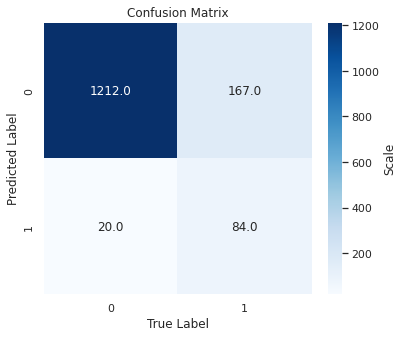

In [ ]:
sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Confusion Matrix" )
# define labels
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Predicted Label", xlabel="True Label")

predicción y evaluación conjunto evaluación mejor modelo

In [ ]:
ypred = BM.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
accuracy=accuracy_score(y_test,ypred) 
print("accuracy : ",accuracy)
recall=recall_score(y_test,ypred, average= None) 
print("recall : ",recall)
precision=precision_score(y_test,ypred, average= None)
print("precision : ",precision)
f1 = f1_score(y_test, ypred, average= None)
print("f1 : ",f1)

accuracy :  0.8787061994609164
recall :  [0.98402556 0.31034483]
precision :  [0.88505747 0.7826087 ]
f1 :  [0.93192133 0.44444444]


Matriz de Confusión para el conjunto de Evaluación

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)
print(cm.T)

[[308  40]
 [  5  18]]


[Text(30.5, 0.5, 'Predicted Label'), Text(0.5, 21.5, 'True Label')]

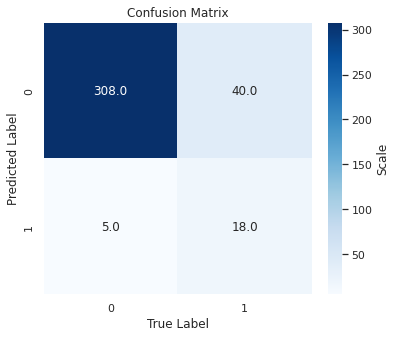

In [ ]:
sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Confusion Matrix" )
# define labels
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Predicted Label", xlabel="True Label")

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#definimos y ajustamos el modelo
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

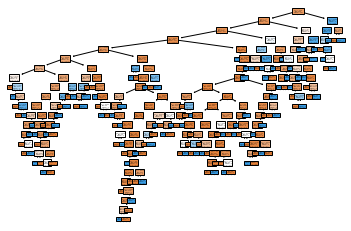

In [ ]:
#Inspeccionamos como quedó el arbol

from sklearn.tree import plot_tree
plot_tree(clf, filled=True);

In [ ]:
#Realizamos las predicciones

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [ ]:
#Accuracy 
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 1.0
Test accuracy: 0.88


Clasifica adecuadamente a todos los datos del conjunto de prueba; pero solo a un 89% de los datos de entrenamiento.

In [ ]:
#Precision: proporción de positivos propuestos por el modelo que fueron correctos
from sklearn.metrics import precision_score

train_precs = precision_score(y_train, y_train_pred)
test_precs = precision_score(y_test, y_test_pred) 
print(f'Train precision: {train_precs:0.2}')
print(f'Test precision: {test_precs:0.2}')

Train precision: 1.0
Test precision: 0.62


En el modelo de entrenamiento, clasifica todos bien. Sin embargo, del total de datos de prueba que predice como positivos, solo el 66% de ellos es correcto; el resto son falsos positivos. 

In [ ]:
#Recall: es la proporción de positivos correctos que fueron encontrados por el modelo
from sklearn.metrics import recall_score

train_rec = recall_score(y_train, y_train_pred)
test_rec = recall_score(y_test, y_test_pred)
print(f'Train recall: {train_rec:0.2}')
print(f'Test recall: {test_rec:0.2}')

Train recall: 1.0
Test recall: 0.64


En el conjunto de entrenamiento, clasifica correctamente a todos los positivos. Sin embargo, en el de prueba, el modelo solo logra predecir correctamente al 66% de los valores positivos (al otro 44% lo clasifica como negativo). Es decir, son falsos negativos.

In [ ]:
#F1
from sklearn.metrics import f1_score

train_f1 = f1_score(y_train,y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f'Train f1: {train_f1:0.2}')
print(f'Test f1: {test_f1:0.2}')

Train f1: 1.0
Test f1: 0.63


Otra manera de calcularlo es sacar un reporte:

In [ ]:
#Reporte
from sklearn.metrics import classification_report

print(f'Train Report: {classification_report(y_train, y_train_pred)}')
print(f'Test Report: {classification_report(y_test, y_test_pred)}')

Train Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483

Test Report:               precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.62      0.64      0.63        58

    accuracy                           0.88       371
   macro avg       0.77      0.78      0.78       371
weighted avg       0.88      0.88      0.88       371



Calculamos la matriz de confusión que nos indica los FP, FN, VP, VN

In [ ]:
from sklearn.metrics import confusion_matrix

#para el conjunto de entrenamiento
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

array([[1232,    0],
       [   0,  251]])

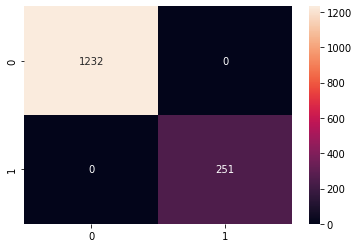

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot= True, fmt='g')

Notamos que no hay falsos positivos ni falsos negativos.

In [ ]:
#para el conjunto de prueba
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[290,  23],
       [ 21,  37]])

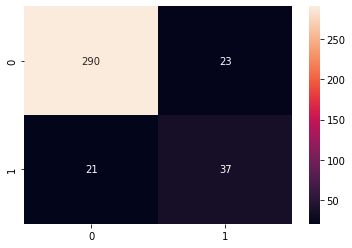

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot= True, fmt='g')

Ahora si, hay valores que fueron clasificados mal. Tenemos 20 falsos positivos y 20 falsos negativos.

Podemos concluir que el modelo tal y como está definido, está sobreajustando. 

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#InfoDecisionTreeClassifier?? #Info. del modelo

In [ ]:
#Armamos un diccionario con los parametros elegidos 
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 5] ,
    'min_samples_leaf': [1, 5, 10],
}

In [ ]:
#Listamos las diferentes combinaciones posibles
from sklearn.model_selection import ParameterGrid

for params in ParameterGrid(param_grid):
    print(params)
    model = DecisionTreeClassifier(**params, random_state=0)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 5}
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 10}
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
{'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1}
{'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 5}
{'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 10}
{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1}
{'crite

In [ ]:
#Utilizamos grid-search y 5-fold cross-validation 
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=3)#cv, divide el data set usando cross validation
cv.fit(X_train, y_train);#A este objeto le pasamos los datos de train y valid que teniamos inicialmente y

In [ ]:
#Obtenemos resultados una tabla de resultados posibles y una lista de los mejores clasificadores.

results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

print("crit.\tdepth\tminsamp\t| mean\tstd\trank")
for p, m, s, r in zip(params, mean, std, rank):
    print(f"{p['criterion']}\t{p['max_depth']}\t{p['min_samples_leaf']}\t| {m:0.2f}\t{s:0.2f}\t{r}")

crit.	depth	minsamp	| mean	std	rank
gini	1	1	| 0.87	0.01	16
gini	1	5	| 0.87	0.01	16
gini	1	10	| 0.87	0.01	16
gini	2	1	| 0.87	0.01	5
gini	2	5	| 0.87	0.01	9
gini	2	10	| 0.87	0.01	11
gini	3	1	| 0.87	0.02	6
gini	3	5	| 0.87	0.02	8
gini	3	10	| 0.87	0.02	10
gini	5	1	| 0.87	0.01	2
gini	5	5	| 0.87	0.01	4
gini	5	10	| 0.87	0.02	1
entropy	1	1	| 0.87	0.01	16
entropy	1	5	| 0.87	0.01	16
entropy	1	10	| 0.87	0.01	16
entropy	2	1	| 0.87	0.01	13
entropy	2	5	| 0.87	0.01	16
entropy	2	10	| 0.87	0.01	16
entropy	3	1	| 0.87	0.01	12
entropy	3	5	| 0.87	0.01	14
entropy	3	10	| 0.87	0.01	15
entropy	5	1	| 0.87	0.02	3
entropy	5	5	| 0.87	0.02	7
entropy	5	10	| 0.86	0.02	24


In [ ]:
best_model = cv.best_estimator_

In [ ]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}

El modelo mejor comportado tiene los siguientes parámetros: 

Criterion = gini

max_depth = 5

min_samples_leaf = 10


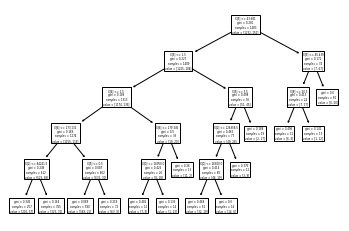

In [ ]:
from sklearn.tree import plot_tree

plot_tree(best_model);

Ahora vamos a evaluar sobre el conjunto de entrenamiento y sobre el conjunto de evaluación.

In [ ]:
# Accuracy
y_train_pred_b = best_model.predict(X_train)
y_test_pred_b = best_model.predict(X_test)

In [ ]:
train_acc = accuracy_score(y_train, y_train_pred_b)
test_acc = accuracy_score(y_test, y_test_pred_b)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 0.89
Test accuracy: 0.89


Los conjuntos de entrenamiento y de test clasifican correctamente el 89% de los datos. 

In [ ]:
# Precisión
train_precs = precision_score(y_train, y_train_pred_b)
test_precs = precision_score(y_test, y_test_pred_b) 
print(f'Train precision: {train_precs:0.2}')
print(f'Test precision: {test_precs:0.2}')

Train precision: 0.94
Test precision: 0.83


El modelo de entrenamiento clasifica correctamente el 94% de los datos. Por otra parte, del total de datos de prueba que predice como positivos, el 83% de ellos es correcto, el resto son falsos positivos.

In [ ]:
# Recall
train_rec = recall_score(y_train, y_train_pred_b)
test_rec = recall_score(y_test, y_test_pred_b)
print(f'Train recall: {train_rec:0.2}')
print(f'Test recall: {test_rec:0.2}')

Train recall: 0.4
Test recall: 0.41


In [ ]:
# Matriz de confusión
from sklearn.metrics import plot_confusion_matrix
cm_train = confusion_matrix(y_train, y_train_pred_b)
cm_train

array([[1225,    7],
       [ 150,  101]])

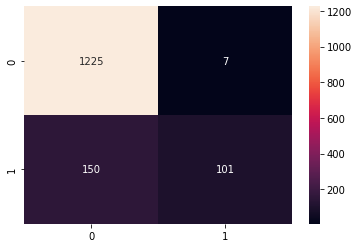

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_train_pred_b), annot= True, fmt='g')

In [ ]:
#para el conjunto de prueba
cm_test = confusion_matrix(y_test, y_test_pred_b)
cm_test

array([[308,   5],
       [ 34,  24]])

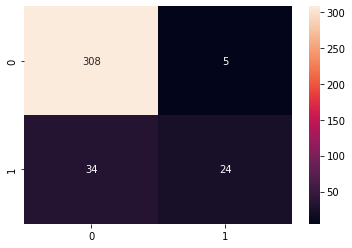

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_b), annot= True, fmt='g')